In [ ]:
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Credit.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.Income=df.Income*1000
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [ ]:
df.Married.replace({'Yes':1,'No':0},inplace=True)

In [ ]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45218.885000,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35244.273165,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10354.000000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21007.250000,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33115.500000,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57470.750000,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186634.000000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


<Axes: >

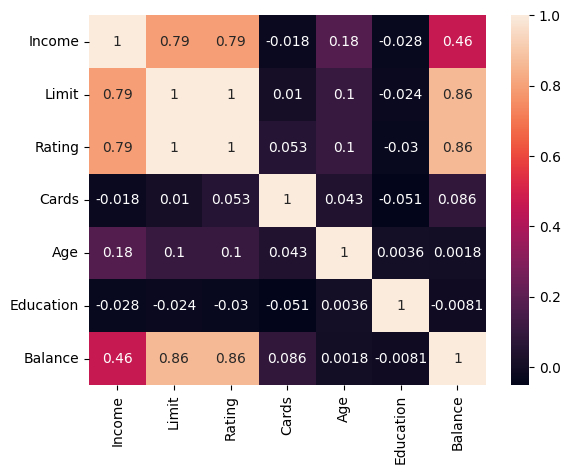

In [ ]:
sns.heatmap(data=df[['Income','Limit','Rating','Cards','Age','Education','Balance']].corr(),annot=True)

In [ ]:
X=df[['Income','Limit','Rating','Cards','Age','Education']]
X['constant']=1

<ipython-input-77-c95afe214e81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['constant']=1


In [ ]:
X=X[['constant','Income', 'Limit','Cards', 'Age', 'Education']]
y=df['Balance']

In [ ]:
VIF = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [ ]:
VIF

[39.05758638269125,
 2.759808404902836,
 2.6997707901332006,
 1.0071729949870571,
 1.038539420526955,
 1.0035638399305689]

In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
X=X[['Income', 'Limit','Cards', 'Age', 'Education']]


In [ ]:
sfs = SequentialFeatureSelector(estimator=sklearn.linear_model.LinearRegression(),
                                k_features=3,
                                forward=True,
                                verbose=3,
                                scoring='neg_mean_absolute_error')

features=sfs.fit(X,y)


[2023-11-22 05:07:20] Features: 1/3 -- score: -179.10978766098356
[2023-11-22 05:07:20] Features: 2/3 -- score: -125.50389723454043
[2023-11-22 05:07:20] Features: 3/3 -- score: -121.41220096384632

In [ ]:
features.k_feature_names_

('Income', 'Limit', 'Cards')

In [ ]:
X=df[['Income','Limit','Cards','Married']]

In [ ]:
reg=sklearn.linear_model.LinearRegression()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
reg.fit(X_train,y_train)
y_hat=reg.predict(X_test)

sklearn.metrics.mean_absolute_error(y_true=y_test,y_pred=y_hat)

128.35605031862798

In [ ]:
(y_test-y_hat).shape

(80,)

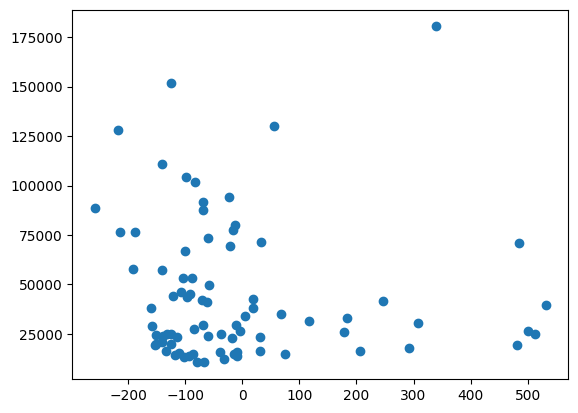

In [ ]:
plt.scatter(np.array(y_test-y_hat),np.squeeze(np.array(X_test)[:,0]))